In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
ex=pd.read_csv(r"C:\Users\techg\OneDrive\Documents\Desktop\ML_Project\Dataset\exercise.csv")
ex

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [4]:
cal=pd.read_csv(r"C:\Users\techg\OneDrive\Documents\Desktop\ML_Project\Dataset\calories.csv")
cal

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [5]:
df=ex.merge(cal,on='User_ID')
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [6]:
print(df.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


In [7]:
df['Height_m'] = df['Height'] / 100

df['BMI'] = df['Weight'] /(df['Height_m']**2)

print(df[['Height' , 'Weight' ,'BMI']].head())

   Height  Weight        BMI
0   190.0    94.0  26.038781
1   166.0    60.0  21.773842
2   179.0    79.0  24.655910
3   179.0    71.0  22.159109
4   154.0    58.0  24.456063


In [8]:
df['Systolic_BP'] = 100 + (df['Age'] / 2)

df['Diastolic_BP'] = 60 + (df['Age'] / 3)

print(df[['Age' , 'Systolic_BP', 'Diastolic_BP']].head)

<bound method NDFrame.head of        Age  Systolic_BP  Diastolic_BP
0       68        134.0     82.666667
1       20        110.0     66.666667
2       69        134.5     83.000000
3       34        117.0     71.333333
4       27        113.5     69.000000
...    ...          ...           ...
14995   20        110.0     66.666667
14996   27        113.5     69.000000
14997   43        121.5     74.333333
14998   78        139.0     86.000000
14999   63        131.5     81.000000

[15000 rows x 3 columns]>


In [ ]:
#Smoking Prediction function
def assign_smoking(age):
    if age < 20:
        return 0  
    elif 20 <= age < 35:
        return np.random.choice([0, 1], p=[0.7, 0.3])  
    else:
        return np.random.choice([0, 1], p=[0.5, 0.5]) 

df['Smoking'] = df['Age'].apply(assign_smoking)

print(df[['Age', 'Smoking']].head())

   Age  Smoking
0   68        0
1   20        1
2   69        1
3   34        0
4   27        1


In [10]:
# Diabetes prediction function
def assign_diabetes(age, bmi):
    if age > 45 and bmi > 30:
        return 1  
    elif age > 35 and bmi > 27:
        return np.random.choice([0, 1], p=[0.6, 0.4])
    else:
        return 0 

df['Diabetes'] = df.apply(lambda row: assign_diabetes(row['Age'], row['BMI']), axis=1)

print(df[['Age', 'BMI', 'Diabetes']].head()) 

   Age        BMI  Diabetes
0   68  26.038781         0
1   20  21.773842         0
2   69  24.655910         0
3   34  22.159109         0
4   27  24.456063         0


In [ ]:
# Save new data set (Optional)
df.to_csv("modified_dataset.csv", index=False)
print("✅ Dataset successfully saved as modified_dataset.csv!")

✅ Dataset successfully saved as modified_dataset.csv!


In [12]:
df.drop('User_ID', axis=1, inplace=True)

In [13]:
df.drop('Duration', axis=1, inplace=True)

In [14]:
df.drop('Height_m', axis=1, inplace=True)

In [15]:
df.isnull().sum()

Gender          0
Age             0
Height          0
Weight          0
Heart_Rate      0
Body_Temp       0
Calories        0
BMI             0
Systolic_BP     0
Diastolic_BP    0
Smoking         0
Diabetes        0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        15000 non-null  object 
 1   Age           15000 non-null  int64  
 2   Height        15000 non-null  float64
 3   Weight        15000 non-null  float64
 4   Heart_Rate    15000 non-null  float64
 5   Body_Temp     15000 non-null  float64
 6   Calories      15000 non-null  float64
 7   BMI           15000 non-null  float64
 8   Systolic_BP   15000 non-null  float64
 9   Diastolic_BP  15000 non-null  float64
 10  Smoking       15000 non-null  int32  
 11  Diabetes      15000 non-null  int64  
dtypes: float64(8), int32(1), int64(2), object(1)
memory usage: 1.3+ MB


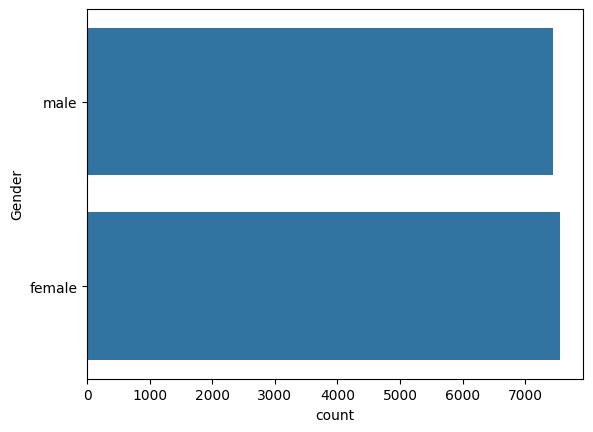

In [18]:
sns.countplot(df['Gender'])
plt.show()

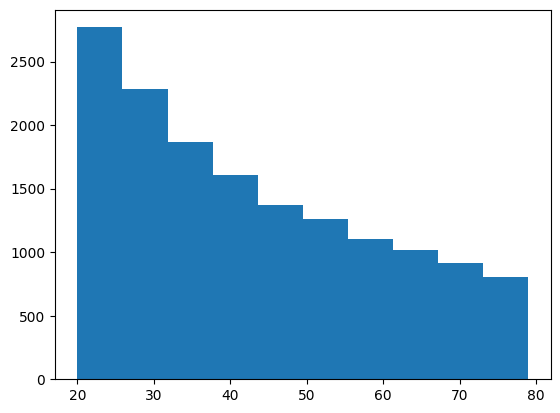

In [19]:
plt.hist(df['Age'])
plt.show()

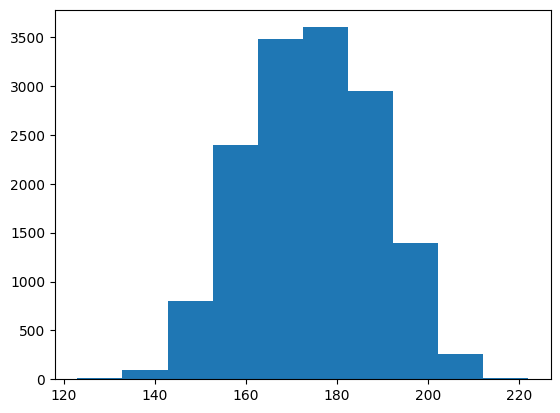

In [20]:
plt.hist(df['Height'])
plt.show()

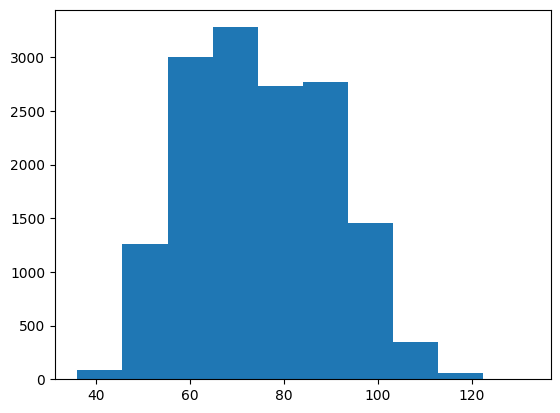

In [21]:
plt.hist(df['Weight'])
plt.show()

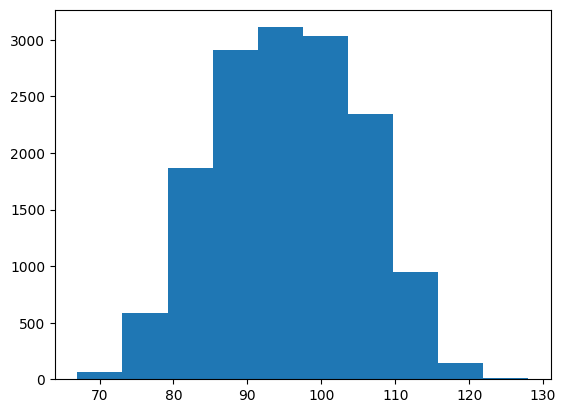

In [22]:
plt.hist(df['Heart_Rate'])
plt.show()

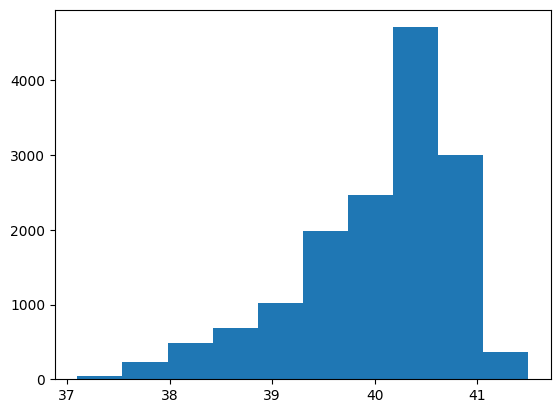

In [23]:
plt.hist(df['Body_Temp'])
plt.show()

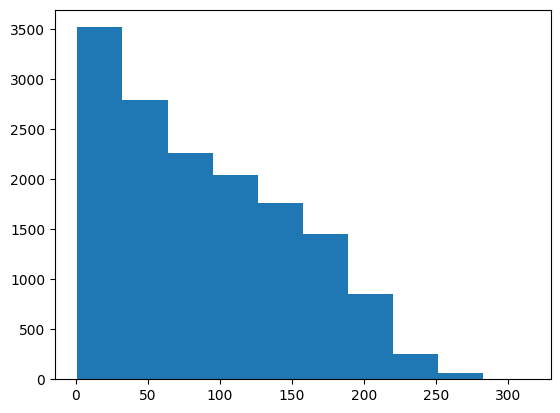

In [24]:
plt.hist(df['Calories'])
plt.show()

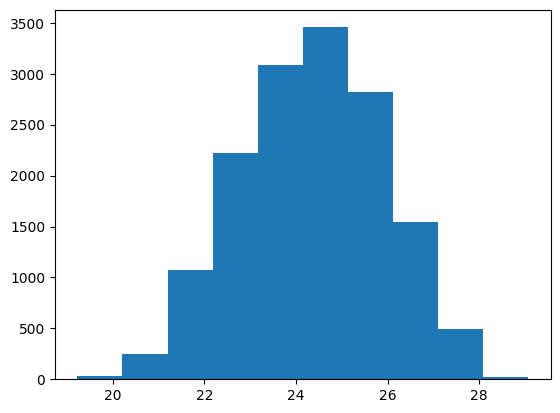

In [25]:
plt.hist(df['BMI'])
plt.show()

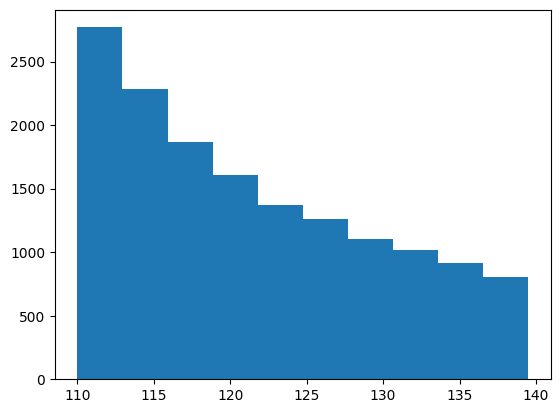

In [26]:
plt.hist(df['Systolic_BP'])
plt.show()

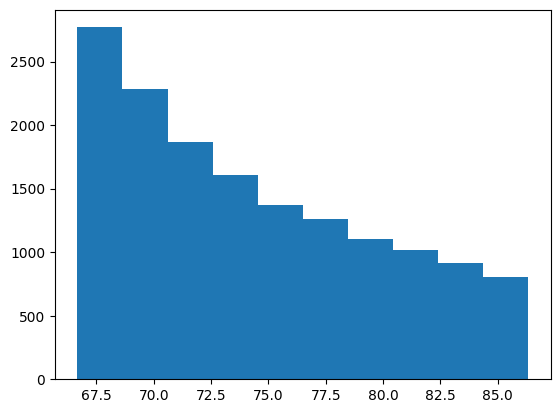

In [27]:
plt.hist(df['Diastolic_BP'])
plt.show()

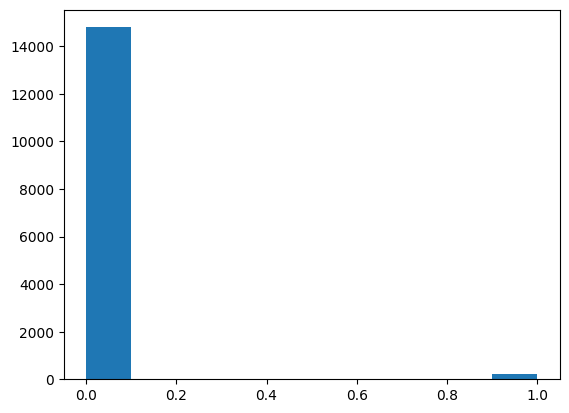

In [28]:
plt.hist(df['Diabetes'])
plt.show()

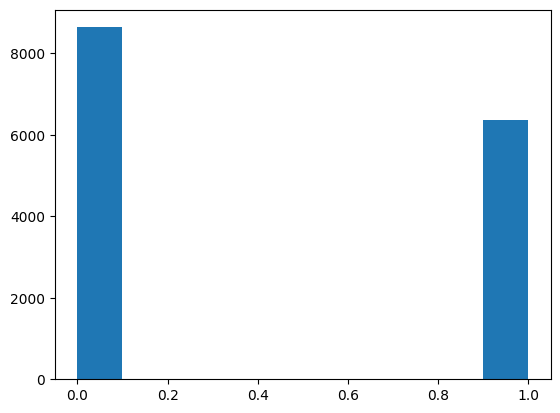

In [29]:
plt.hist(df['Smoking'])
plt.show()

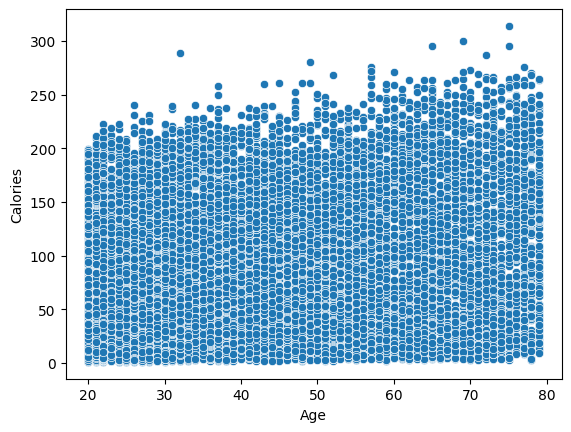

In [30]:
sns.scatterplot(x=df['Age'],y=df['Calories'])
plt.show()

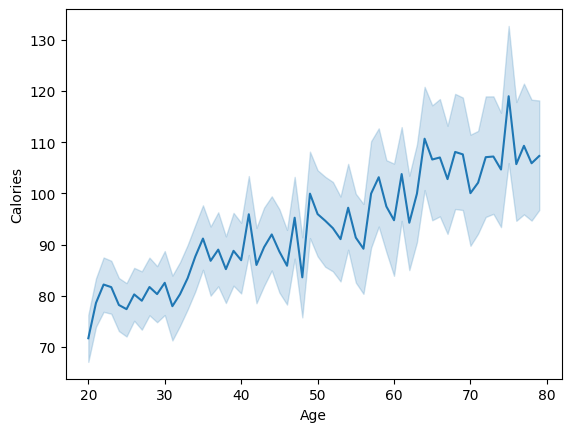

In [31]:
sns.lineplot(x=df['Age'],y= df['Calories'])
plt.show()

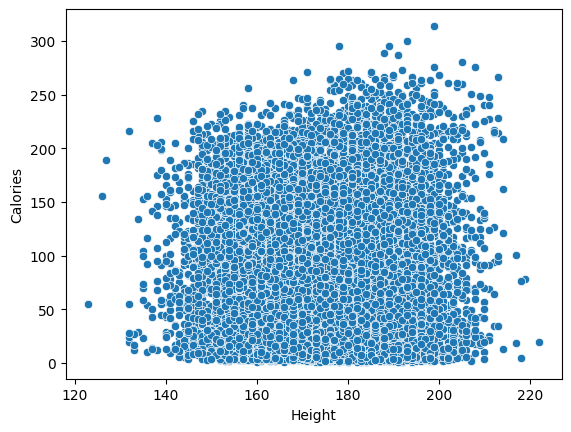

In [32]:
sns.scatterplot(x=df['Height'],y=df['Calories'])
plt.show()

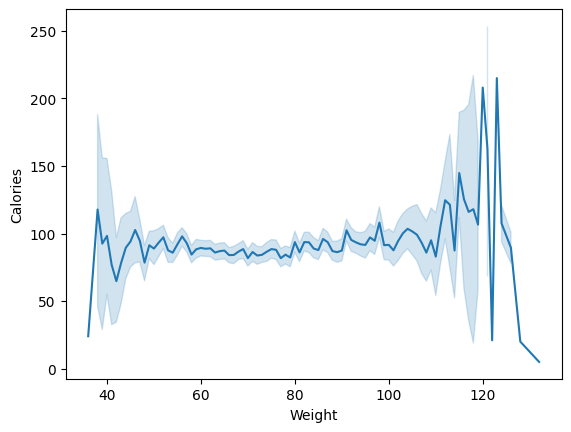

In [33]:
sns.lineplot(x=df['Weight'],y=df['Calories'])
plt.show()

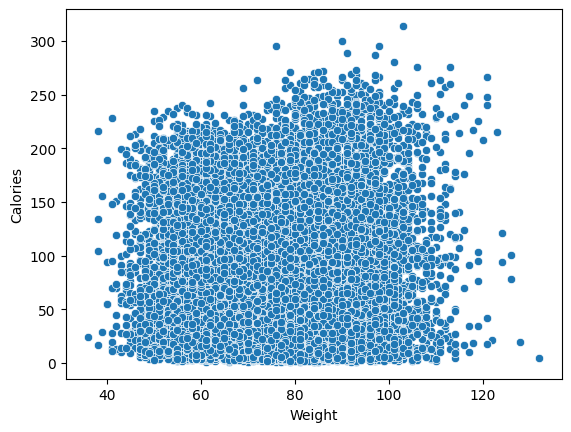

In [34]:
sns.scatterplot(x=df['Weight'],y=df['Calories'])
plt.show()

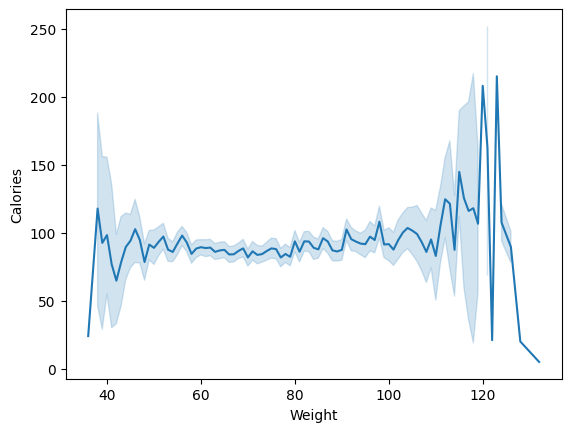

In [35]:
sns.lineplot(x=df['Weight'],y=df['Calories'])
plt.show()

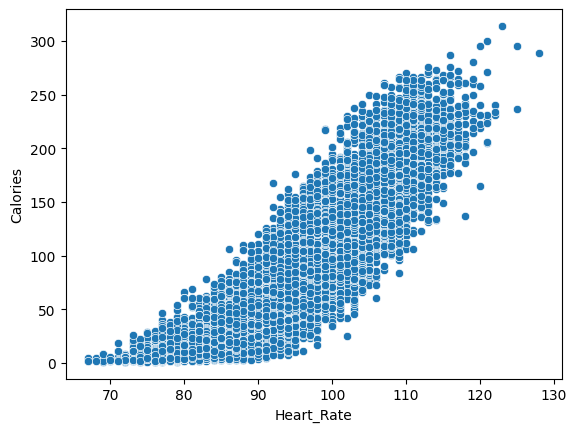

In [36]:
sns.scatterplot(x=df['Heart_Rate'],y=df['Calories'])
plt.show()

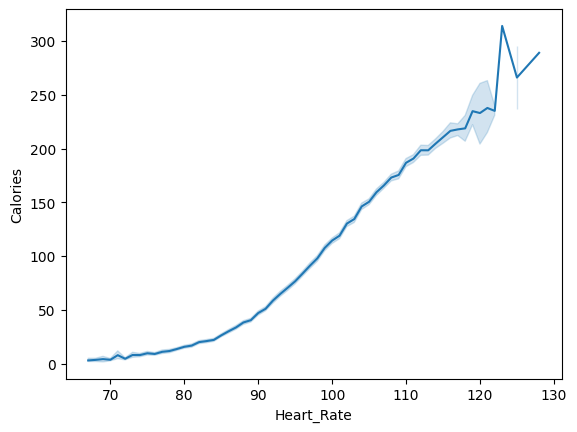

In [37]:
sns.lineplot(x=df['Heart_Rate'],y=df['Calories'])
plt.show()

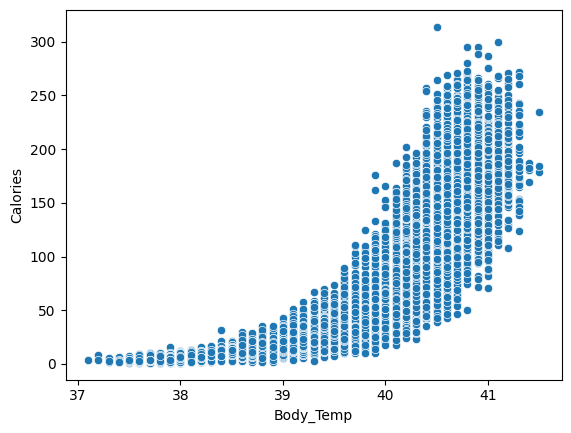

In [38]:
sns.scatterplot(x=df['Body_Temp'],y=df['Calories'])
plt.show()

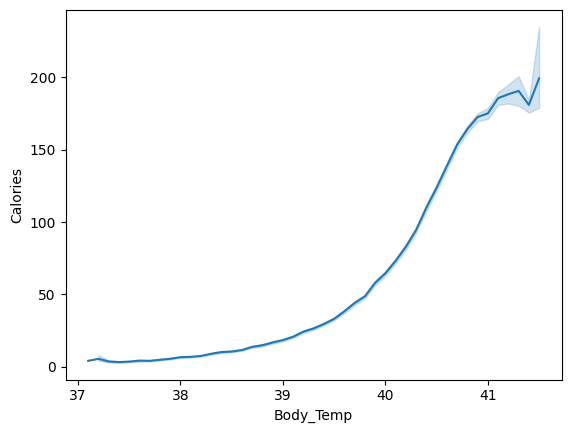

In [39]:
sns.lineplot(x=df['Body_Temp'],y=df['Calories'])
plt.show()

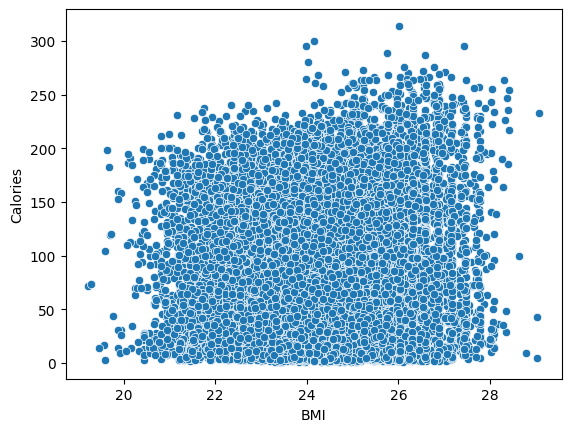

In [40]:
sns.scatterplot(x=df['BMI'],y=df['Calories'])
plt.show()

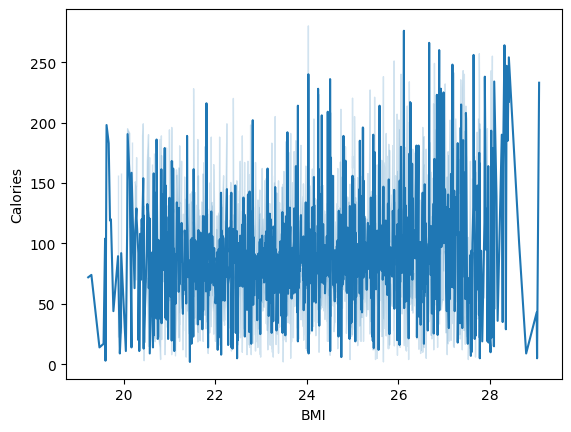

In [41]:
sns.lineplot(x=df['BMI'],y=df['Calories'])
plt.show()

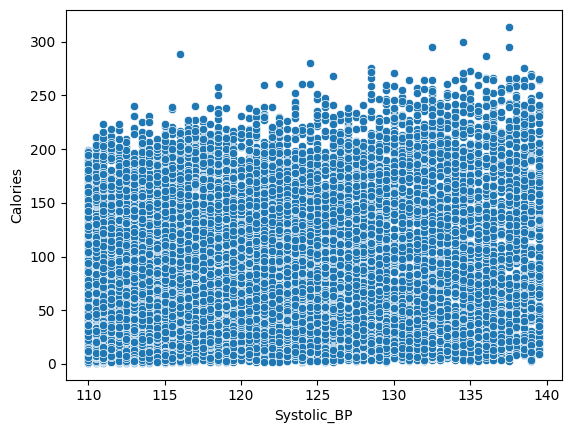

In [42]:
sns.scatterplot(x=df['Systolic_BP'],y=df['Calories'])
plt.show()

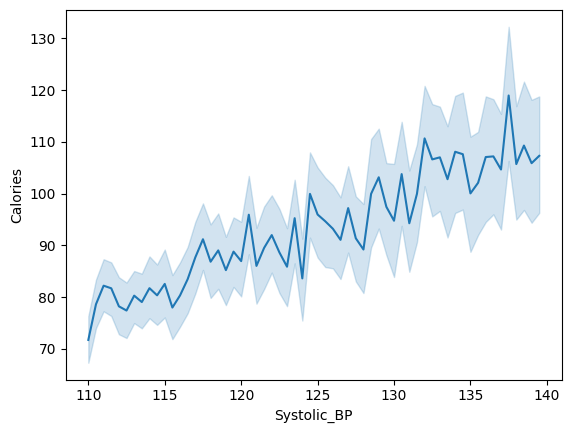

In [43]:
sns.lineplot(x=df['Systolic_BP'],y=df['Calories'])
plt.show()

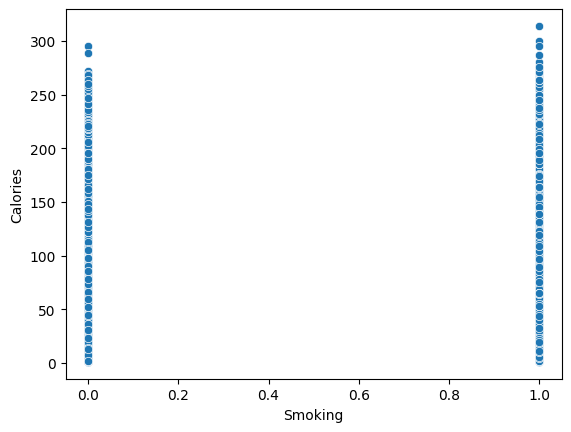

In [44]:
sns.scatterplot(x=df['Smoking'],y=df['Calories'])
plt.show()

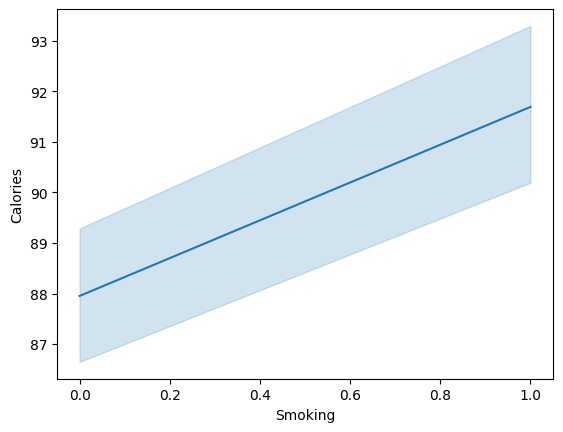

In [45]:
sns.lineplot(x=df['Smoking'],y=df['Calories'])
plt.show()

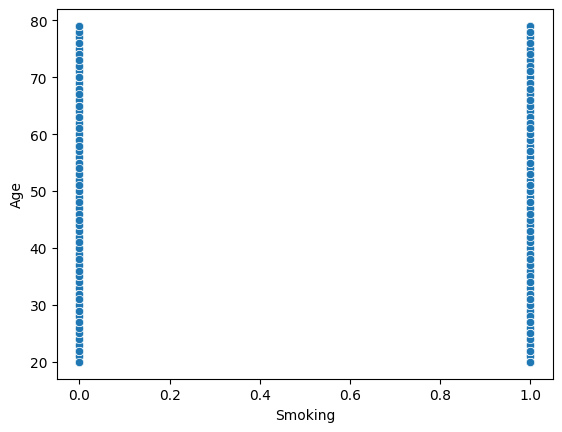

In [46]:
sns.scatterplot(x=df['Smoking'],y=df['Age'])
plt.show()

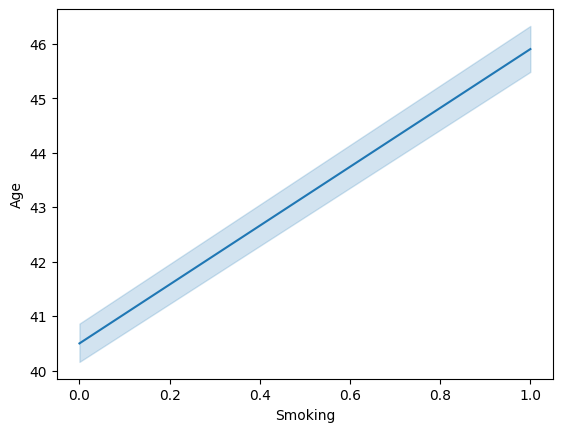

In [47]:
sns.lineplot(x=df['Smoking'],y=df['Age'])
plt.show()

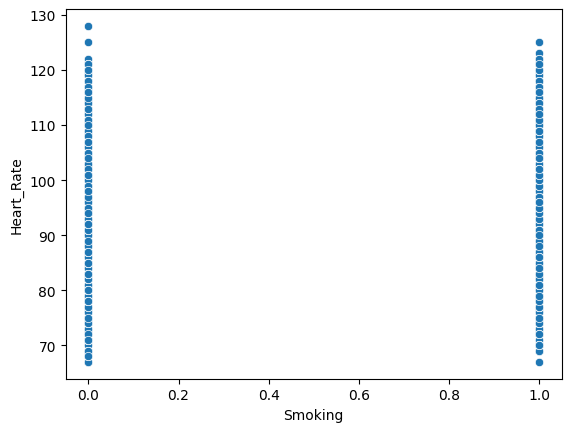

In [48]:
sns.scatterplot(x=df['Smoking'],y=df['Heart_Rate'])
plt.show()

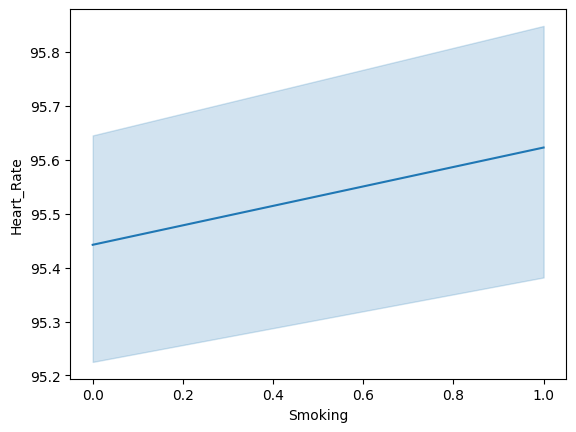

In [49]:
sns.lineplot(x=df['Smoking'],y=df['Heart_Rate'])
plt.show()

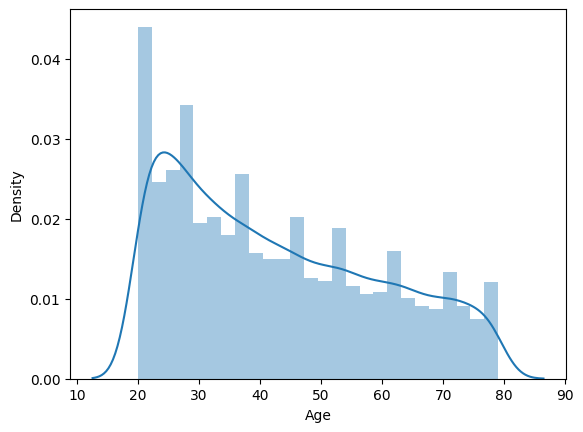

In [50]:
sns.distplot(df['Age'])
plt.show()

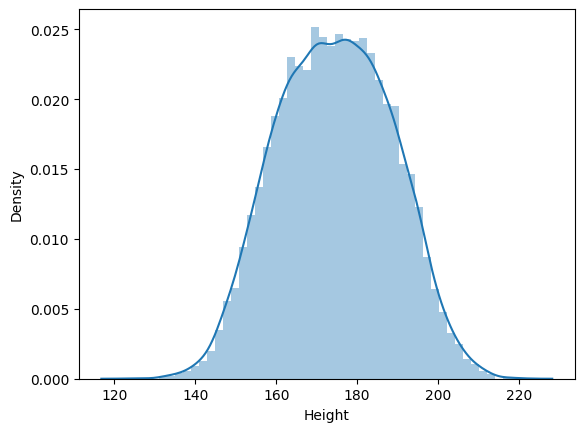

In [51]:
sns.distplot(df['Height'])
plt.show()

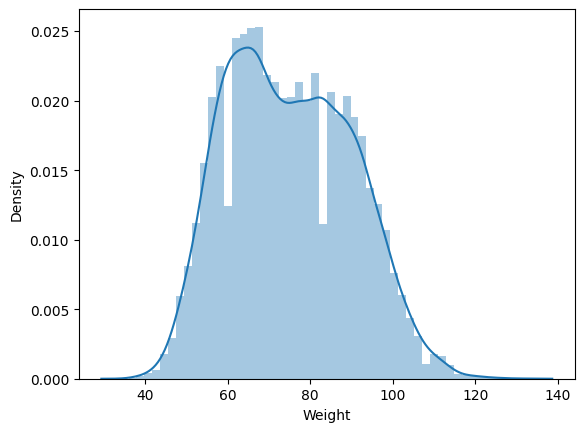

In [52]:
sns.distplot(df['Weight'])
plt.show()

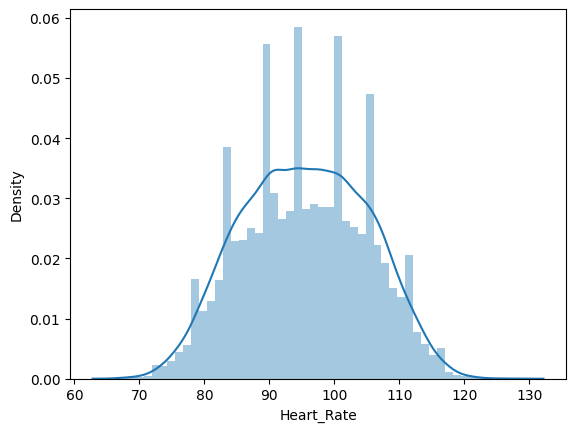

In [53]:
sns.distplot(df['Heart_Rate'])
plt.show()

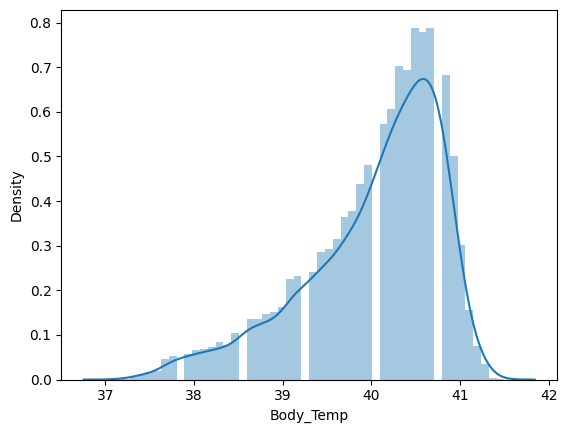

In [54]:
sns.distplot(df['Body_Temp'])
plt.show()

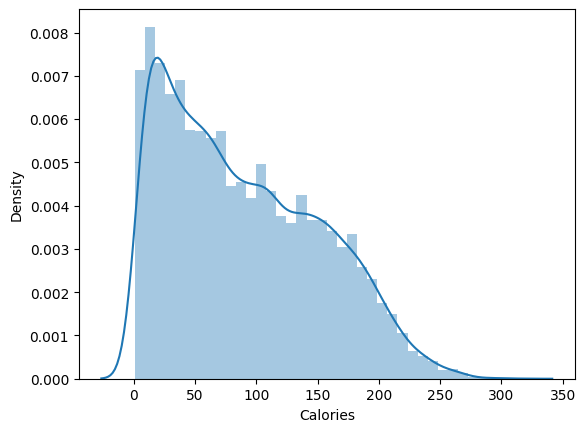

In [55]:
sns.distplot(df['Calories'])
plt.show()

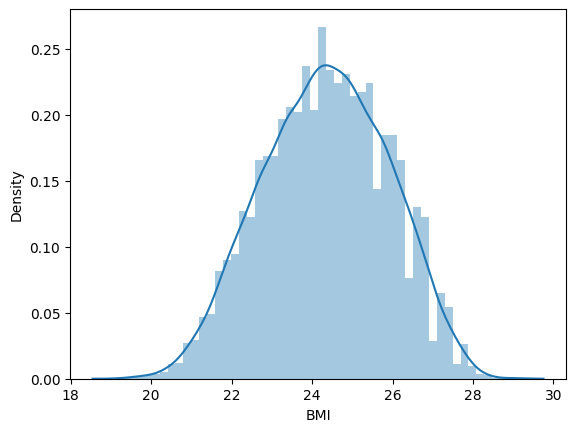

In [56]:
sns.distplot(df['BMI'])
plt.show()

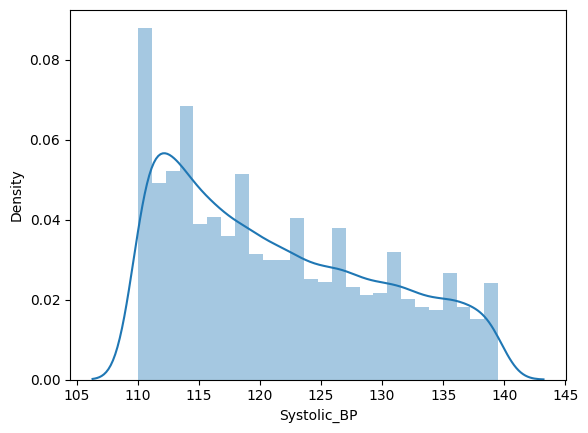

In [57]:
sns.distplot(df['Systolic_BP'])
plt.show()

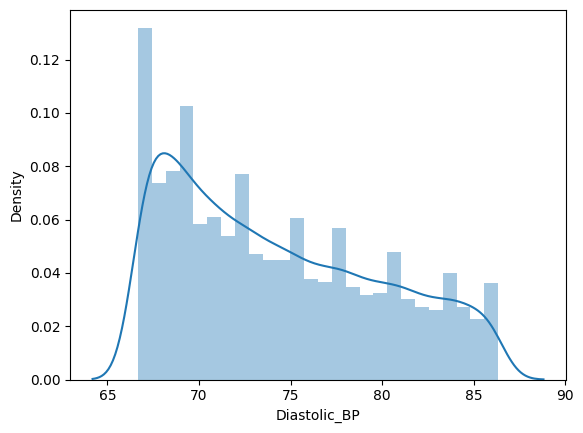

In [58]:
sns.distplot(df['Diastolic_BP'])
plt.show()

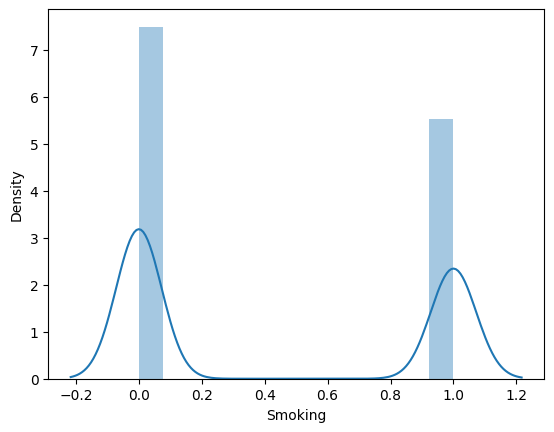

In [59]:
sns.distplot(df['Smoking'])
plt.show()

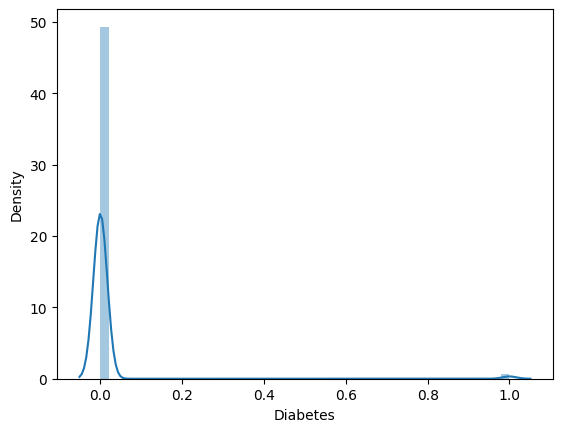

In [60]:
sns.distplot(df['Diabetes'])
plt.show()

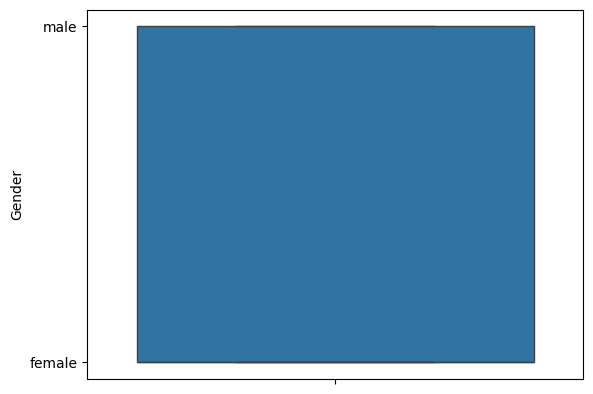

In [61]:
sns.boxplot(df['Gender'])
plt.show()

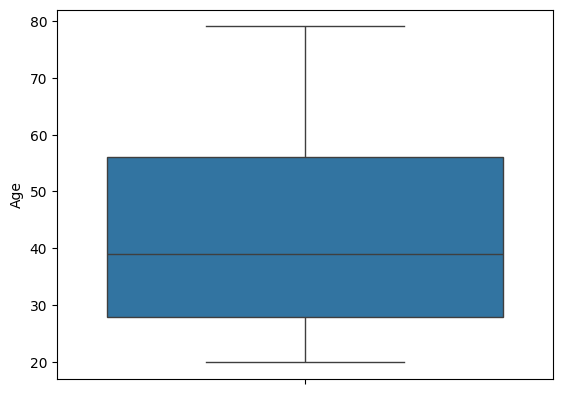

In [62]:
sns.boxplot(df['Age'])
plt.show()

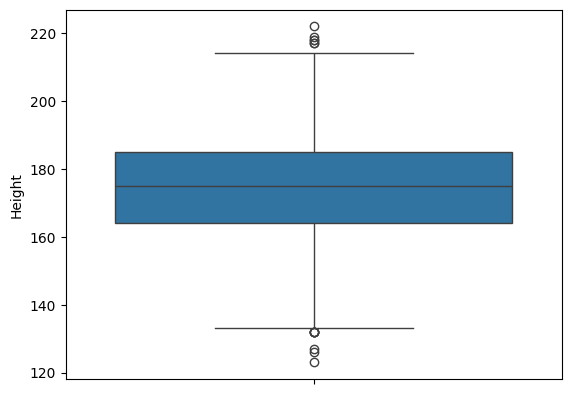

In [63]:
sns.boxplot(df['Height'])
plt.show()

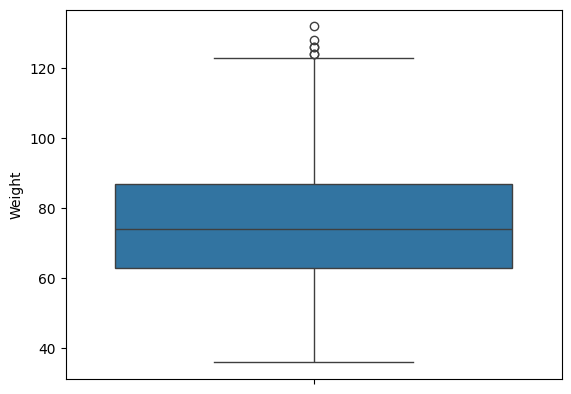

In [64]:
sns.boxplot(df['Weight'])
plt.show()

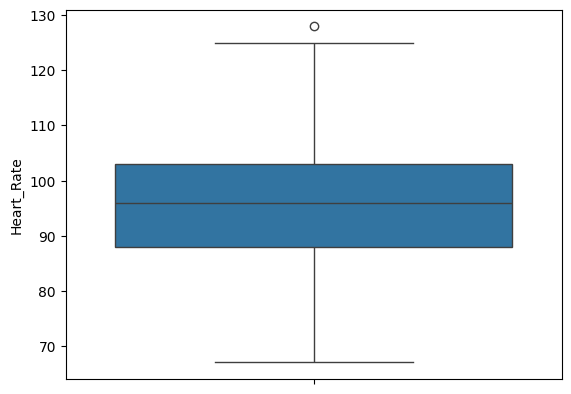

In [65]:
sns.boxplot(df['Heart_Rate'])
plt.show()

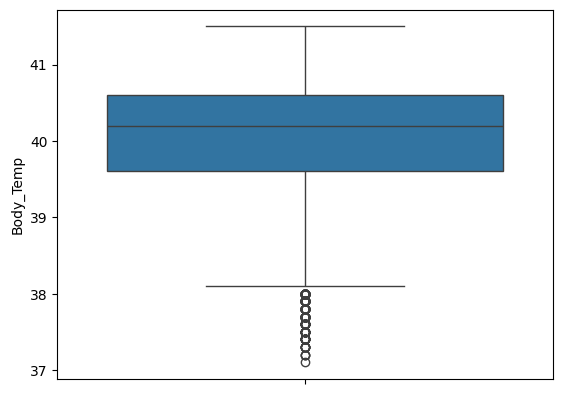

In [66]:
sns.boxplot(df['Body_Temp'])
plt.show()

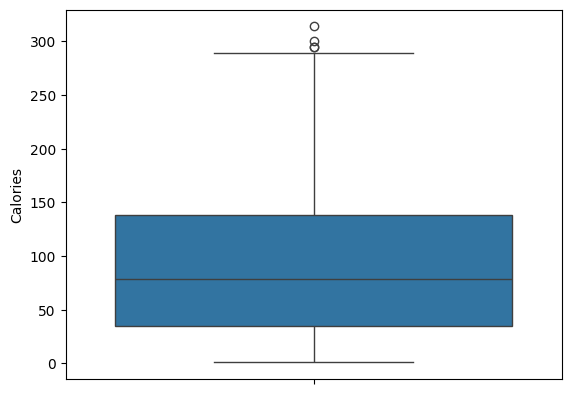

In [67]:
sns.boxplot(df['Calories'])
plt.show()

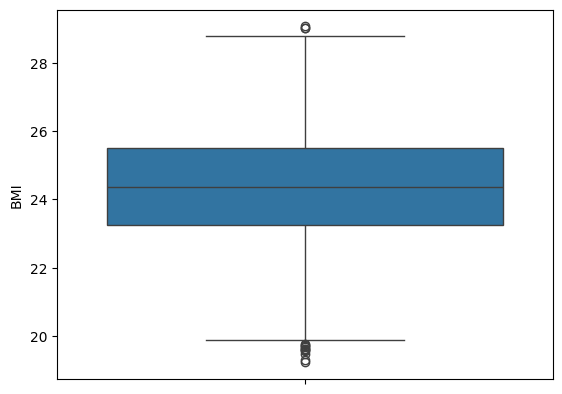

In [68]:
sns.boxplot(df['BMI'])
plt.show()

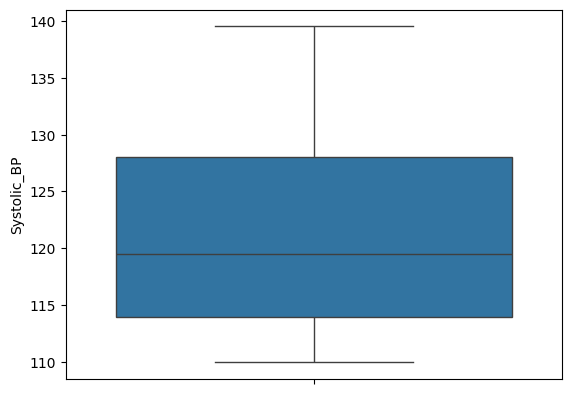

In [69]:
sns.boxplot(df['Systolic_BP'])
plt.show()

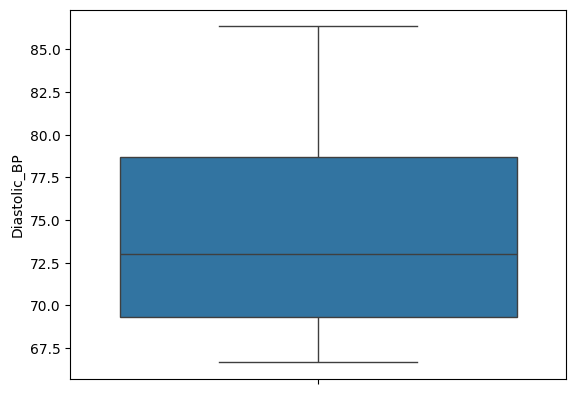

In [70]:
sns.boxplot(df['Diastolic_BP'])
plt.show()

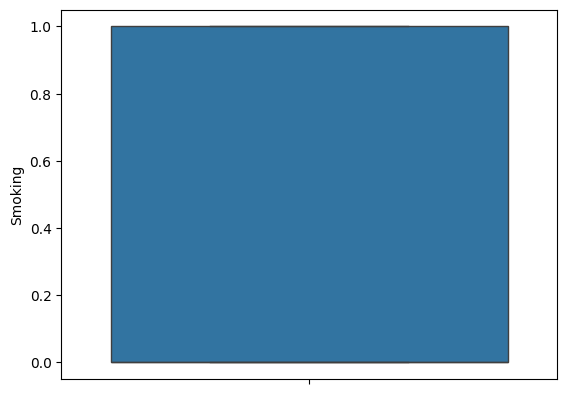

In [71]:
sns.boxplot(df['Smoking'])
plt.show()

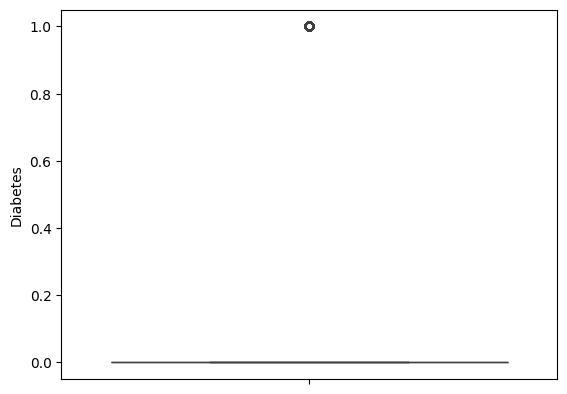

In [72]:
sns.boxplot(df['Diabetes'])
plt.show()

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
lab_enc=LabelEncoder()

In [75]:
df['Gender']=lab_enc.fit_transform(df['Gender'])
df

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
0,1,68,190.0,94.0,105.0,40.8,231.0,26.038781,134.0,82.666667,0,0
1,0,20,166.0,60.0,94.0,40.3,66.0,21.773842,110.0,66.666667,1,0
2,1,69,179.0,79.0,88.0,38.7,26.0,24.655910,134.5,83.000000,1,0
3,0,34,179.0,71.0,100.0,40.5,71.0,22.159109,117.0,71.333333,0,0
4,0,27,154.0,58.0,81.0,39.8,35.0,24.456063,113.5,69.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,92.0,40.4,45.0,23.087868,110.0,66.666667,0,0
14996,0,27,165.0,65.0,85.0,39.2,23.0,23.875115,113.5,69.000000,0,0
14997,0,43,159.0,58.0,90.0,40.1,75.0,22.942130,121.5,74.333333,1,0
14998,1,78,193.0,97.0,84.0,38.3,11.0,26.040968,139.0,86.000000,1,0


In [76]:
q1=df.quantile(0.25)
q1

Gender            0.000000
Age              28.000000
Height          164.000000
Weight           63.000000
Heart_Rate       88.000000
Body_Temp        39.600000
Calories         35.000000
BMI              23.243408
Systolic_BP     114.000000
Diastolic_BP     69.333333
Smoking           0.000000
Diabetes          0.000000
Name: 0.25, dtype: float64

In [77]:
q3=df.quantile(0.75)
q3

Gender            1.000000
Age              56.000000
Height          185.000000
Weight           87.000000
Heart_Rate      103.000000
Body_Temp        40.600000
Calories        138.000000
BMI              25.492722
Systolic_BP     128.000000
Diastolic_BP     78.666667
Smoking           1.000000
Diabetes          0.000000
Name: 0.75, dtype: float64

In [78]:
iqr=q3-q1
iqr

Gender            1.000000
Age              28.000000
Height           21.000000
Weight           24.000000
Heart_Rate       15.000000
Body_Temp         1.000000
Calories        103.000000
BMI               2.249314
Systolic_BP      14.000000
Diastolic_BP      9.333333
Smoking           1.000000
Diabetes          0.000000
dtype: float64

In [79]:
h_high=q3.Height+(1.5*iqr.Height)

In [80]:
df[df['Height']>h_high]

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
1464,1,51,217.0,118.0,85.0,39.1,19.0,25.058931,125.5,77.000000,0,0
6711,1,40,218.0,132.0,88.0,37.8,5.0,27.775440,120.0,73.333333,0,1
10362,1,22,222.0,128.0,84.0,39.3,20.0,25.971918,111.0,67.333333,0,0
12189,1,21,219.0,126.0,97.0,40.4,78.0,26.271345,110.5,67.000000,0,0
12360,1,41,218.0,119.0,85.0,40.2,76.0,25.039980,120.5,73.666667,0,0
13276,1,55,217.0,126.0,91.0,40.4,101.0,26.757842,127.5,78.333333,0,0


In [81]:
new_df=df[df['Height']<h_high]

In [82]:
new_df.shape

(14994, 12)

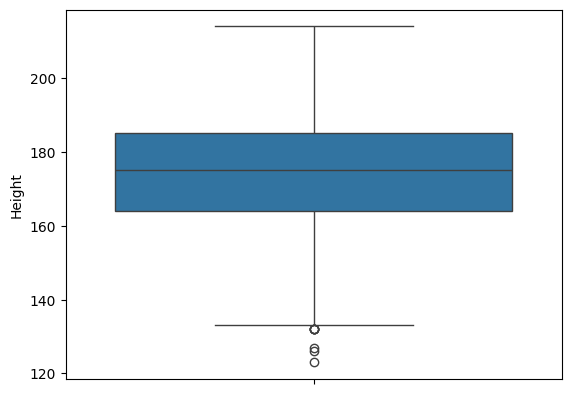

In [83]:
sns.boxplot(new_df['Height'])
plt.show()

In [84]:
h_low=q1.Height-(1.5*iqr.Height)

In [85]:
new_df[new_df['Height']<h_low]

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
529,0,35,132.0,38.0,112.0,40.5,216.0,21.808999,117.5,71.666667,0,0
4200,0,63,123.0,40.0,97.0,39.9,55.0,26.439289,131.5,81.000000,0,0
4404,0,20,132.0,41.0,85.0,39.3,20.0,23.530762,110.0,66.666667,0,0
4855,0,59,132.0,40.0,92.0,39.9,55.0,22.956841,129.5,79.666667,0,0
6226,0,58,127.0,40.0,102.0,40.8,189.0,24.800050,129.0,79.333333,1,0
7774,0,30,126.0,39.0,104.0,40.7,156.0,24.565382,115.0,70.000000,1,0
8931,0,26,132.0,36.0,91.0,39.2,24.0,20.661157,113.0,68.666667,0,0
13100,0,51,132.0,41.0,86.0,39.2,28.0,23.530762,125.5,77.000000,1,0


In [86]:
new_df1=new_df[new_df['Height']>h_low]

In [87]:
new_df1.shape

(14986, 12)

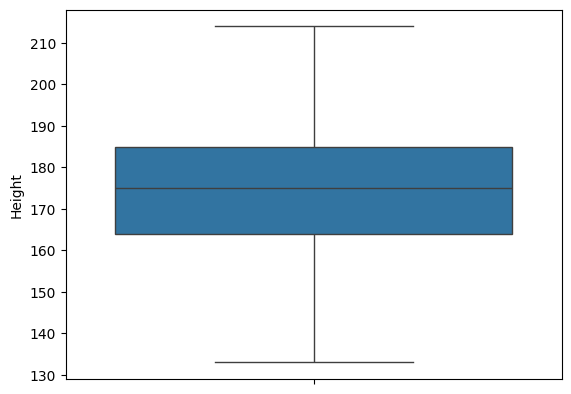

In [88]:
sns.boxplot(new_df1['Height'])
plt.show()

In [89]:
w_high=q3.Weight+(1.5*iqr.Weight)

In [90]:
df[df['Weight']>w_high]

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
1909,1,67,212.0,124.0,87.0,40.1,94.0,27.589890,133.5,82.333333,1,1
6711,1,40,218.0,132.0,88.0,37.8,5.0,27.775440,120.0,73.333333,0,1
10362,1,22,222.0,128.0,84.0,39.3,20.0,25.971918,111.0,67.333333,0,0
12189,1,21,219.0,126.0,97.0,40.4,78.0,26.271345,110.5,67.000000,0,0
13276,1,55,217.0,126.0,91.0,40.4,101.0,26.757842,127.5,78.333333,0,0
13806,1,43,214.0,124.0,103.0,40.7,121.0,27.076601,121.5,74.333333,0,0


In [91]:
new_df2=df[df['Weight']<w_high]

In [92]:
new_df2.shape

(14993, 12)

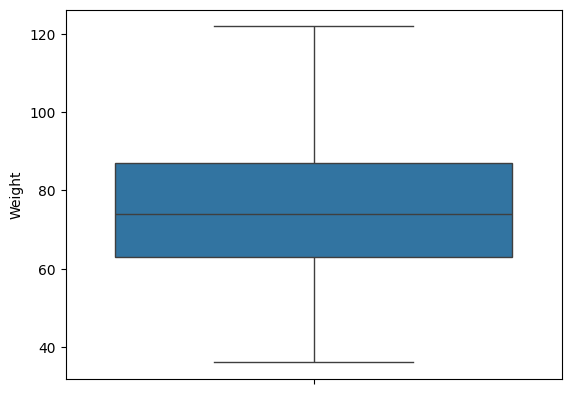

In [93]:
sns.boxplot(new_df2['Weight'])
plt.show()

In [94]:
hrt_high=q3.Heart_Rate+(1.5*iqr.Heart_Rate)

In [95]:
df[df['Heart_Rate']>hrt_high]

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
9981,1,32,188.0,91.0,128.0,40.9,289.0,25.746944,116.0,70.666667,0,0


In [96]:
new_df3=df[df['Heart_Rate']<hrt_high]

In [97]:
new_df3.shape

(14999, 12)

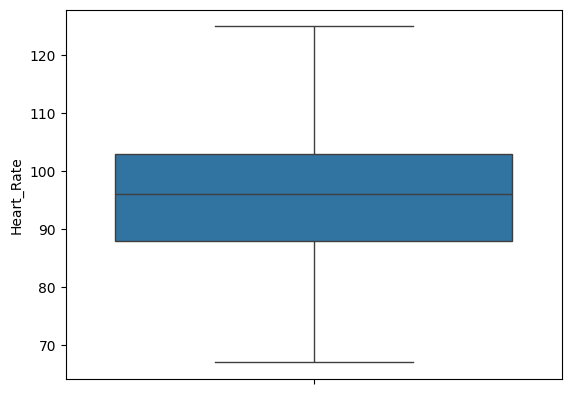

In [98]:
sns.boxplot(new_df3['Heart_Rate'])
plt.show()

In [99]:
body_low=q1.Body_Temp-(1.5*iqr.Body_Temp)

In [100]:
df[df['Body_Temp']<body_low]

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
10,0,36,177.0,76.0,74.0,37.8,3.0,24.258674,118.0,72.000000,1,0
24,1,48,182.0,85.0,80.0,37.7,3.0,25.661152,124.0,76.000000,0,0
49,1,48,152.0,59.0,79.0,38.0,5.0,25.536704,124.0,76.000000,0,0
232,1,45,195.0,99.0,83.0,37.9,7.0,26.035503,122.5,75.000000,1,0
301,0,31,169.0,69.0,74.0,37.6,3.0,24.158818,115.5,70.333333,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14732,1,44,175.0,74.0,74.0,37.9,2.0,24.163265,122.0,74.666667,1,0
14749,1,70,150.0,59.0,80.0,37.9,4.0,26.222222,135.0,83.333333,0,0
14753,1,22,202.0,100.0,81.0,38.0,5.0,24.507401,111.0,67.333333,1,0
14894,1,48,173.0,77.0,81.0,38.0,6.0,25.727555,124.0,76.000000,1,0


In [101]:
new_df4=df[df['Body_Temp']>body_low]

In [102]:
new_df4.shape

(14540, 12)

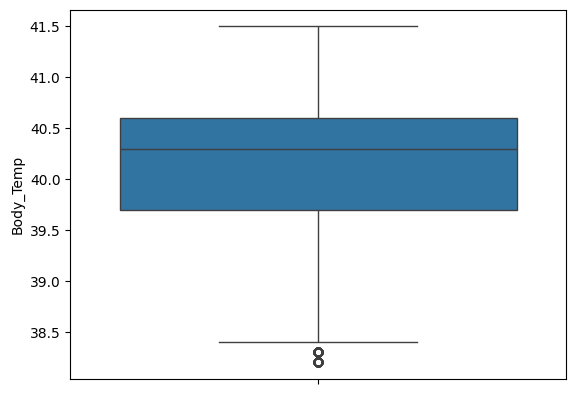

In [103]:
sns.boxplot(new_df4['Body_Temp'])
plt.show()

In [104]:
cal_high=q3.Calories+(1.5*iqr.Calories)

In [105]:
df[df['Calories']>cal_high]

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
428,1,75,199.0,103.0,123.0,40.5,314.0,26.009444,137.5,85.000000,1,0
3357,1,65,189.0,98.0,125.0,40.9,295.0,27.434842,132.5,81.666667,0,0
6240,1,69,193.0,90.0,121.0,41.1,300.0,24.161722,134.5,83.000000,1,0
13871,1,75,178.0,76.0,120.0,40.8,295.0,23.986870,137.5,85.000000,1,0


In [106]:
new_df5=df[df['Calories']<cal_high]

In [107]:
new_df5.shape

(14996, 12)

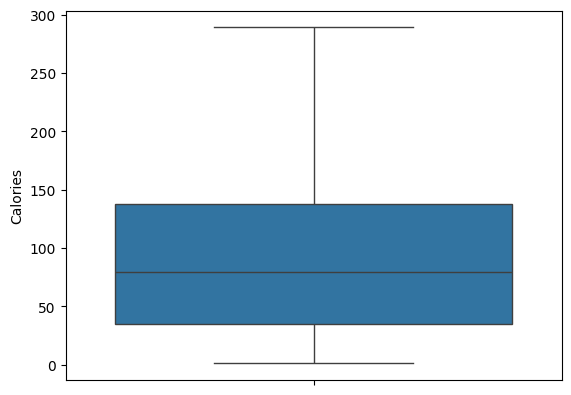

In [108]:
sns.boxplot(new_df5['Calories'])
plt.show()

In [109]:
cal_high=q3.BMI+(1.5*iqr.BMI)

In [110]:
df[df['BMI']>cal_high]

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
4534,1,78,179.0,93.0,79.0,37.6,5.0,29.025311,139.0,86.000000,1,0
4723,1,61,165.0,79.0,88.0,39.5,43.0,29.017447,130.5,80.333333,1,0
10603,1,73,172.0,86.0,105.0,41.1,233.0,29.069767,136.5,84.333333,0,0


In [111]:
new_df6=df[df['BMI']<cal_high]

In [112]:
new_df6.shape

(14997, 12)

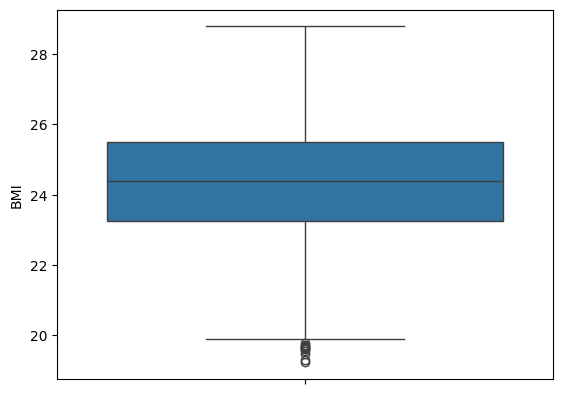

In [113]:
sns.boxplot(new_df6['BMI'])
plt.show()

In [114]:
cal_Low=q3.BMI+(1.5*iqr.BMI)

In [115]:
new_df[new_df['BMI']<h_low]

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
0,1,68,190.0,94.0,105.0,40.8,231.0,26.038781,134.0,82.666667,0,0
1,0,20,166.0,60.0,94.0,40.3,66.0,21.773842,110.0,66.666667,1,0
2,1,69,179.0,79.0,88.0,38.7,26.0,24.655910,134.5,83.000000,1,0
3,0,34,179.0,71.0,100.0,40.5,71.0,22.159109,117.0,71.333333,0,0
4,0,27,154.0,58.0,81.0,39.8,35.0,24.456063,113.5,69.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,92.0,40.4,45.0,23.087868,110.0,66.666667,0,0
14996,0,27,165.0,65.0,85.0,39.2,23.0,23.875115,113.5,69.000000,0,0
14997,0,43,159.0,58.0,90.0,40.1,75.0,22.942130,121.5,74.333333,1,0
14998,1,78,193.0,97.0,84.0,38.3,11.0,26.040968,139.0,86.000000,1,0


<Axes: ylabel='Smoking'>

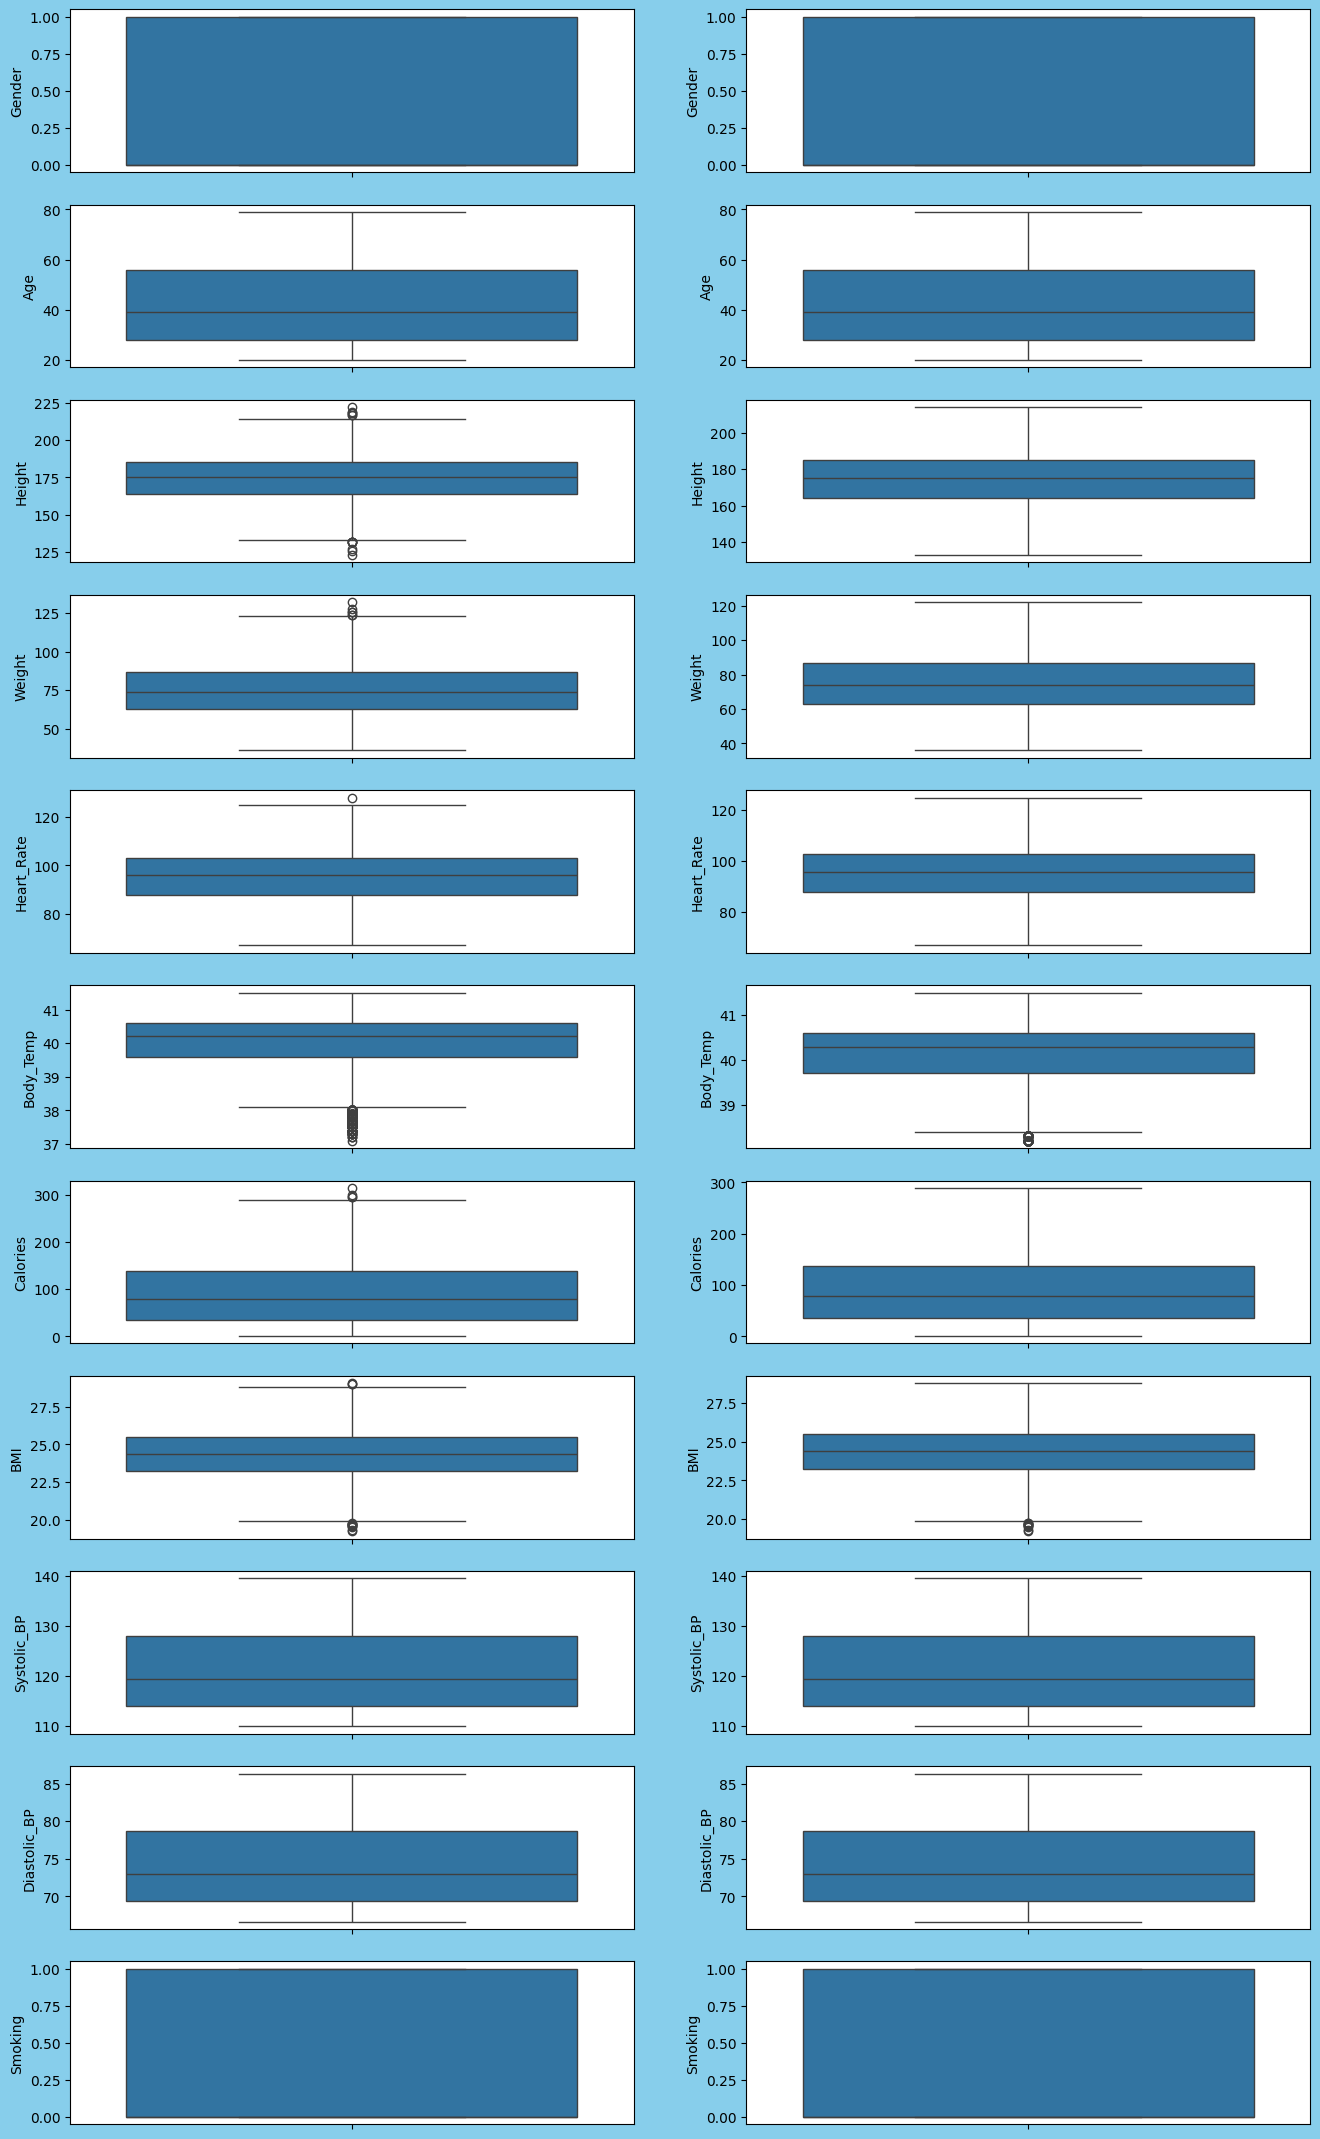

In [116]:
plt.figure(figsize=(16,30),facecolor="skyblue")
plt.subplot(12,2,1)
sns.boxplot(df['Gender'])

plt.subplot(12,2,2)
sns.boxplot(new_df['Gender'])

plt.subplot(12,2,3)
sns.boxplot(df['Age'])

plt.subplot(12,2,4)
sns.boxplot(new_df['Age'])

plt.subplot(12,2,5)
sns.boxplot(df['Height'])

plt.subplot(12,2,6)
sns.boxplot(new_df1['Height'])

plt.subplot(12,2,7)
sns.boxplot(df['Weight'])

plt.subplot(12,2,8)
sns.boxplot(new_df2['Weight'])

plt.subplot(12,2,9)
sns.boxplot(df['Heart_Rate'])

plt.subplot(12,2,10)
sns.boxplot(new_df3['Heart_Rate'])

plt.subplot(12,2,11)
sns.boxplot(df['Body_Temp'])

plt.subplot(12,2,12)
sns.boxplot(new_df4['Body_Temp'])

plt.subplot(12,2,13)
sns.boxplot(df['Calories'])

plt.subplot(12,2,14)
sns.boxplot(new_df5['Calories'])

plt.subplot(12,2,15)
sns.boxplot(df['BMI'])

plt.subplot(12,2,16)
sns.boxplot(new_df6['BMI'])

plt.subplot(12,2,17)
sns.boxplot(df['Systolic_BP'])

plt.subplot(12,2,18)
sns.boxplot(new_df['Systolic_BP'])

plt.subplot(12,2,19)
sns.boxplot(df['Diastolic_BP'])

plt.subplot(12,2,20)
sns.boxplot(new_df['Diastolic_BP'])

plt.subplot(12,2,21)
sns.boxplot(df['Smoking'])

plt.subplot(12,2,22)
sns.boxplot(new_df['Smoking'])


In [117]:
df.skew()

Gender          0.014135
Age             0.473383
Height         -0.006190
Weight          0.226725
Heart_Rate     -0.010704
Body_Temp      -0.994382
Calories        0.505371
BMI            -0.082179
Systolic_BP     0.473383
Diastolic_BP    0.473383
Smoking         0.307052
Diabetes        8.357238
dtype: float64

In [118]:
df.corr()

,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes
Gender,1.000000,0.003222,0.710534,0.783186,0.011555,0.007264,0.022357,0.662327,0.003222,0.003222,0.008493,0.118839
Age,0.003222,1.000000,0.009554,0.090094,0.010482,0.013175,0.154395,0.255609,1.000000,1.000000,0.157295,0.113329
Height,0.710534,0.009554,1.000000,0.958451,0.000528,0.001200,0.017537,0.477897,0.009554,0.009554,0.008277,0.079758
Weight,0.783186,0.090094,0.958451,1.000000,0.004311,0.004095,0.035481,0.700217,0.090094,0.090094,0.023756,0.145304
Heart_Rate,0.011555,0.010482,0.000528,0.004311,1.000000,0.771529,0.897882,0.011792,0.010482,0.010482,0.009292,0.010591
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.771529,1.000000,0.824558,0.010827,0.013175,0.013175,0.003560,0.003423
Calories,0.022357,0.154395,0.017537,0.035481,0.897882,0.824558,1.000000,0.056473,0.154395,0.154395,0.029602,0.040199
BMI,0.662327,0.255609,0.477897,0.700217,0.011792,0.010827,0.056473,1.000000,0.255609,0.255609,0.053082,0.237598
Systolic_BP,0.003222,1.000000,0.009554,0.090094,0.010482,0.013175,0.154395,0.255609,1.000000,1.000000,0.157295,0.113329
Diastolic_BP,0.003222,1.000000,0.009554,0.090094,0.010482,0.013175,0.154395,0.255609,1.000000,1.000000,0.157295,0.113329


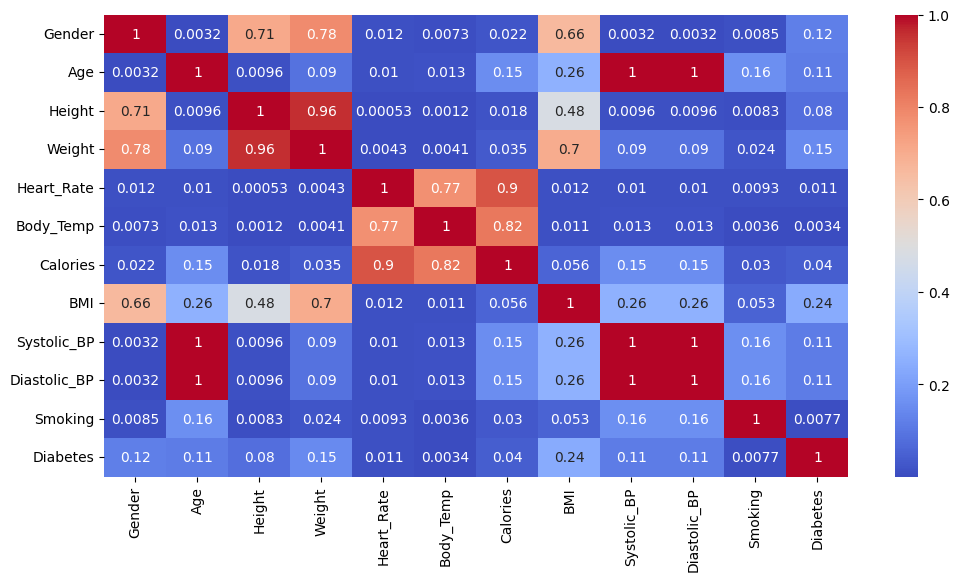

In [119]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

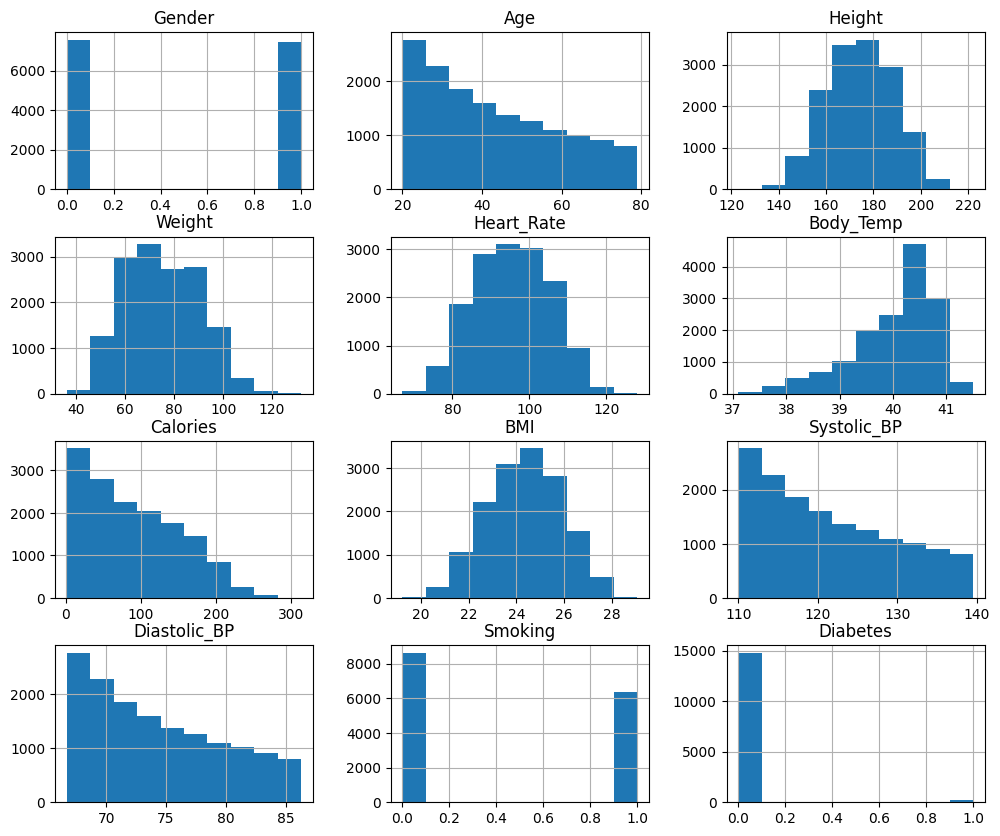

In [120]:
df.hist(figsize=(12, 10))
plt.show()

In [134]:
df['Risk_Score'] = (df['Systolic_BP'] >= 140).astype(int) + \
                   (df['Diastolic_BP'] >= 90).astype(int) + \
                   (df['BMI'] >= 30).astype(int) + \
                   (df['Heart_Rate'] > 100).astype(int) + \
                   (df['Smoking'] == 1).astype(int) + \
                   (df['Diabetes'] == 1).astype(int)

df['Risk_Level'] = df['Risk_Score'].apply(lambda x: 'Low' if x <= 2 else 'Medium' if x <= 4 else 'High')

print(df['Risk_Level'].value_counts())


Risk_Level
Low       14964
Medium       36
Name: count, dtype: int64


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [136]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        15000 non-null  int32  
 1   Age           15000 non-null  int64  
 2   Height        15000 non-null  float64
 3   Weight        15000 non-null  float64
 4   Heart_Rate    15000 non-null  float64
 5   Body_Temp     15000 non-null  float64
 6   Calories      15000 non-null  float64
 7   BMI           15000 non-null  float64
 8   Systolic_BP   15000 non-null  float64
 9   Diastolic_BP  15000 non-null  float64
 10  Smoking       15000 non-null  int32  
 11  Diabetes      15000 non-null  int64  
 12  Risk_Score    15000 non-null  int32  
 13  Risk_Level    15000 non-null  object 
dtypes: float64(8), int32(3), int64(2), object(1)
memory usage: 1.4+ MB


,Gender,Age,Height,Weight,Heart_Rate,Body_Temp,Calories,BMI,Systolic_BP,Diastolic_BP,Smoking,Diabetes,Risk_Score,Risk_Level
0,1,68,190.0,94.0,105.0,40.8,231.0,26.038781,134.0,82.666667,0,0,1,Low
1,0,20,166.0,60.0,94.0,40.3,66.0,21.773842,110.0,66.666667,1,0,1,Low
2,1,69,179.0,79.0,88.0,38.7,26.0,24.655910,134.5,83.000000,1,0,1,Low
3,0,34,179.0,71.0,100.0,40.5,71.0,22.159109,117.0,71.333333,0,0,0,Low
4,0,27,154.0,58.0,81.0,39.8,35.0,24.456063,113.5,69.000000,1,0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,92.0,40.4,45.0,23.087868,110.0,66.666667,0,0,0,Low
14996,0,27,165.0,65.0,85.0,39.2,23.0,23.875115,113.5,69.000000,0,0,0,Low
14997,0,43,159.0,58.0,90.0,40.1,75.0,22.942130,121.5,74.333333,1,0,1,Low
14998,1,78,193.0,97.0,84.0,38.3,11.0,26.040968,139.0,86.000000,1,0,1,Low


In [137]:
X = df.drop(columns=['Risk_Score', 'Risk_Level'])
y = df['Risk_Level']


In [138]:
y = y.map({'Low': 0, 'Medium': 1, 'High': 2})




In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [141]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9996666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2992
           1       1.00      0.88      0.93         8

    accuracy                           1.00      3000
   macro avg       1.00      0.94      0.97      3000
weighted avg       1.00      1.00      1.00      3000



In [144]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Improved Accuracy: 0.9996666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2992
           1       1.00      0.88      0.93         8

    accuracy                           1.00      3000
   macro avg       1.00      0.94      0.97      3000
weighted avg       1.00      1.00      1.00      3000



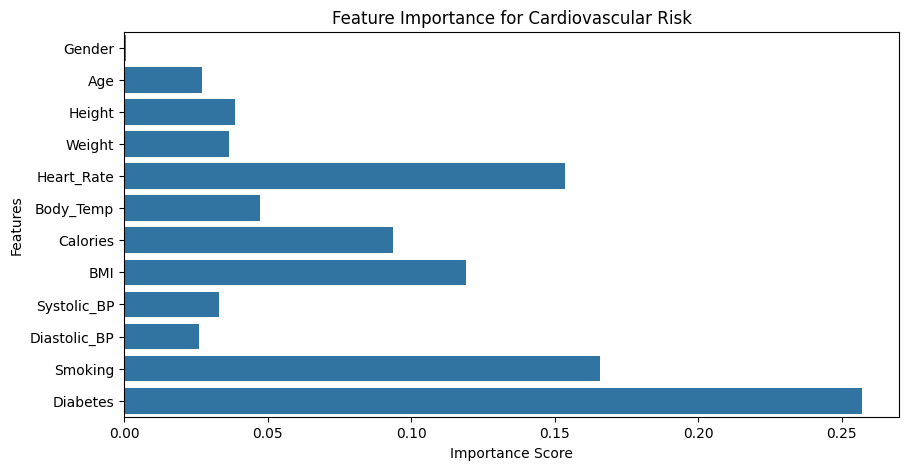

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=features)
plt.title("Feature Importance for Cardiovascular Risk")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [146]:
import pickle

with open("cardio_risk_model.pkl", "wb") as file:
    pickle.dump(best_model, file)
